# Week 3 SA

Hey Everyone!!
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [3]:
import pandas as pd
import numpy as np

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [4]:
df = pd.read_csv('emails.csv')

## Describe the data and generate some basic insights unsing methods like .info

In [ ]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


## Looking at the data

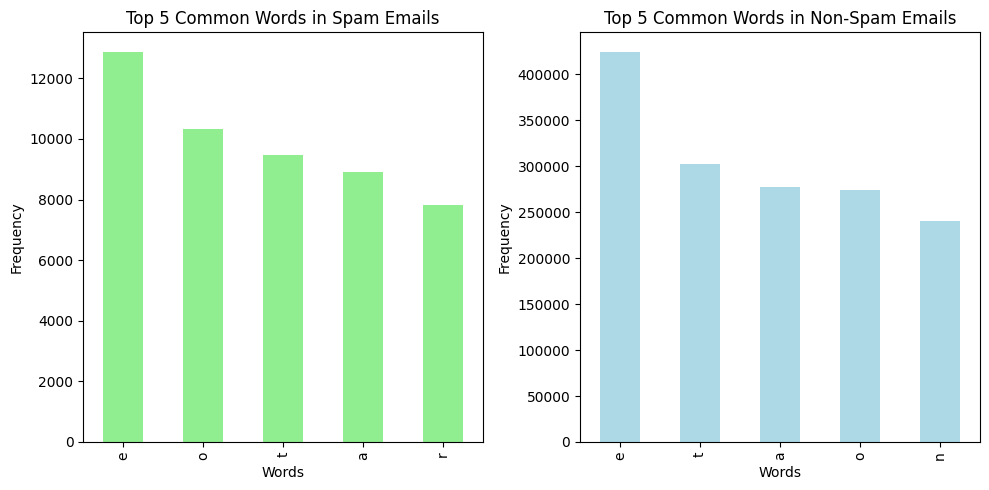

In [ ]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.
spam_df = df[df["spam"] == 1]
non_spam_df = df[df["spam"] == 0]


spam_word_freq = spam_df.drop(['Email No.',"spam"], axis=1).sum()
non_spam_word_freq = non_spam_df.drop(['Email No.',"spam"], axis=1).sum()



top_spam_words = spam_word_freq.sort_values(ascending=False).head(5)
top_non_spam_words = non_spam_word_freq.sort_values(ascending=False).head(5)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
top_spam_words.plot(kind='bar', color = "lightgreen")
plt.title('Top 5 Common Words in Spam Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
top_non_spam_words.plot(kind='bar',color = "lightblue")
plt.title('Top 5 Common Words in Non-Spam Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Figuring out some comparatively more important features

In [ ]:
row_count = df.shape[0]
colunm_count = df.shape[1]
print("Number of rows:", row_count)
print("Number of column:", colunm_count)

Number of rows: 5172
Number of column: 3002


In [ ]:
for column_name in df.columns:
    print(column_name)

In [15]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset?
# Try taking only top 1.5K that will comprise of some of the most "deciding factors"

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Separate the features and the target variable
X = df.drop(['Email No.', 'spam'], axis=1)  # Remove non-feature columns (Email_No. and spam)
y = df['spam']

# Perform feature selection
num_columns_to_keep = 1500
selector = SelectKBest(score_func=f_classif, k=num_columns_to_keep)
X_selected = selector.fit_transform(X, y)

# Get the selected column indices
selected_indices = selector.get_support(indices=True)

# Get the selected column names
selected_columns = X.columns[selected_indices]

# Create a new DataFrame with the selected columns
df_selected = df[['Email No.', 'spam']].join(pd.DataFrame(X_selected, columns=selected_columns))

# Optional: Save the new DataFrame to a new CSV file
df_selected.to_csv('reduced_email.csv', index=False)

In [17]:
row_count = df_selected.shape[0]
colunm_count = df_selected.shape[1]
print("Number of rows:", row_count)
print("Number of column:", colunm_count)

Number of rows: 5172
Number of column: 1502


## Train - Test Split

In [28]:
# Create trianing and testing data
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the reduced dataset
df = pd.read_csv('reduced_email.csv')

# Separate the features and the target variable
X = df.drop(['Email No.', 'spam'], axis=1)  # Remove non-feature columns (Email_No. and spam)
y = df['spam']

# Split the data into training and testing sets
test_size = 0.2  # 20% of the data will be used for testing
random_state = 42  # Set a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Optional: Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (4137, 1500)
Testing set shape: (1035, 1500)


## Making Predictions using Multinomial NB Classifier

In [29]:
# Feed the train data into multinomial naive bias classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [30]:
# Check the model's accuracy of test data and plot the ROC-AUC curve
from sklearn.metrics import accuracy_score
mnb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", mnb_accuracy)

Accuracy: 0.9623188405797102


## Plot the confusion Matrix

In [23]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'
from sklearn.metrics import accuracy_score, confusion_matrix
words_of_choice = ['e', 'o', 't', 'a', 'r']  # Replace with your chosen words
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Actual Not Spam', 'Actual Spam'], columns=['Predicted Not Spam', 'Predicted Spam'])
print("Confusion Matrix:")
print(df_cm)

Confusion Matrix:
                 Predicted Not Spam  Predicted Spam
Actual Not Spam                 988              36
Actual Spam                       3               8


## Trying out with SVMs

Accuracy: 0.9893719806763285


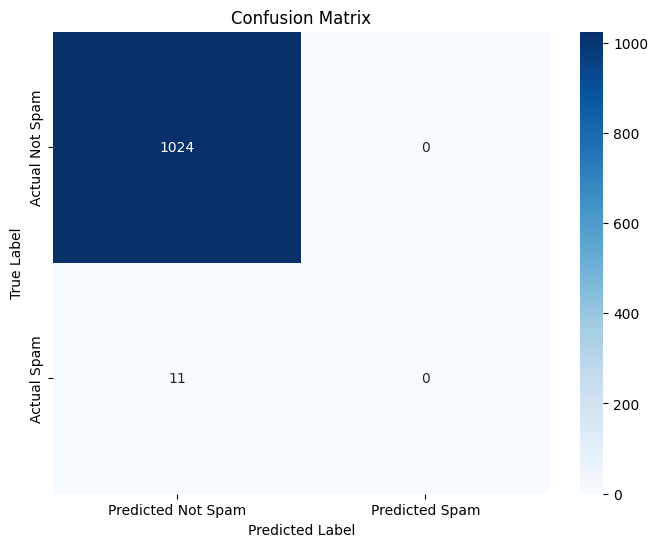

In [31]:
# Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load the reduced dataset
df = pd.read_csv('reduced_email.csv')

# Separate the features and the target variable
X = df.drop(['Email No.', 'spam'], axis=1)  # Remove non-feature columns (Email_No. and spam)
y = df['spam']

# Split the data into training and testing sets
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Train the Support Vector Classifier
classifier = SVC()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the classifier
svc_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svc_accuracy)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['Actual Not Spam', 'Actual Spam'], columns=['Predicted Not Spam', 'Predicted Spam'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Comparing the models

In [33]:
# Which model performed better?
# Can you suggest some reason for better performance of one model over the other?
print("Accuracy of Multinomial Naive Bayes:", mnb_accuracy)
print("Accuracy of Support Vector Classifier:", svc_accuracy)

Accuracy of Multinomial Naive Bayes: 0.9623188405797102
Accuracy of Support Vector Classifier: 0.9893719806763285


The model with a higher accuracy score is considered to have performed better in terms of classification accuracy.Here, **SVC** have higher accuracy score indicates that the model has made more correct predictions on the test set.as compare to MNB.

## Bonus Question

In [ ]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}

In [34]:
# Define the input string
s = "I am a Python developer and currently working on a project to classify mails"

# Split the input string into individual words
words = s.split()

# Calculate the frequency of each word
word_counts = {}
for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Create the dataframe
df = pd.DataFrame({'Word': list(word_counts.keys()), 'Frequency': list(word_counts.values())})
print(df)

         Word  Frequency
0           I          1
1          am          1
2           a          2
3      Python          1
4   developer          1
5         and          1
6   currently          1
7     working          1
8          on          1
9     project          1
10         to          1
11   classify          1
12      mails          1
